# Data science is OSEMN

According to a popular model, the elements of data science are

* Obtaining data
* Scrubbing data
* Exploring data
* Modeling data
* iNterpreting data

and hence the acronym OSEMN, pronounced as “Awesome”.

We will start with the **O**, moving towards the rest later, but first let's have a quick look at what it all boils down to

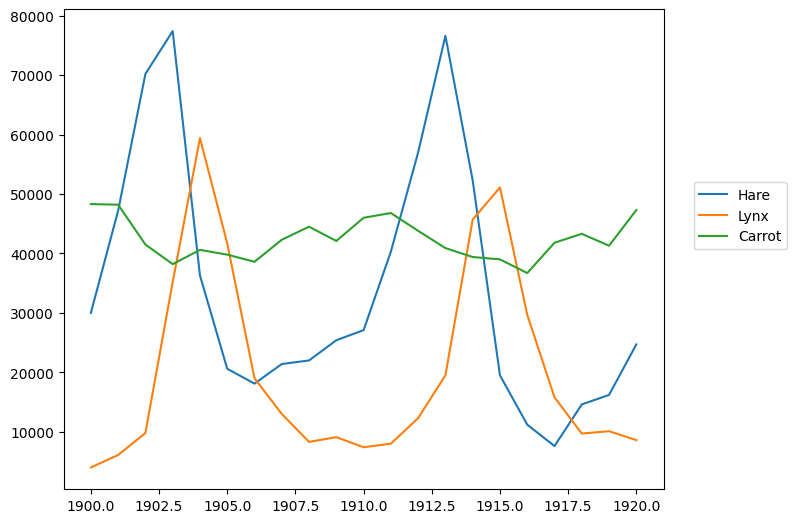

In [27]:
import numpy as np
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T # trick: columns to variables


from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 
plt.show()


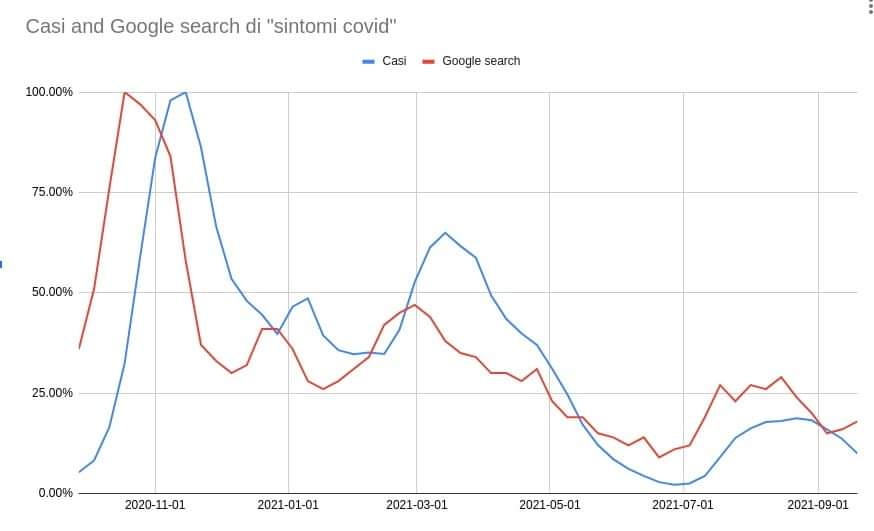

In [28]:
from IPython.display import Image
Image("cases_vs_searches.jpeg")

By plotting the data a clear (and reasonable) correlations between pray and predator becomes evident. How can it be quantified? Is that statistical significant? What about the correlation between carrots and hares? Is that evident? Is that significant?

Finding correlations in data is the main goal of data science, though that is not the end of the story: as this precious [site](http://tylervigen.com/spurious-correlations) demonstrates, **correlations is not causation**. 

my note from professor: to get causation, we need a model that explain data! if we do not have models, then we may have correlations but not causation

(I've been invited to a school of Philosophy of Science to talk about the role of ML in Physics and they even asked me to write a summary of that. You find it [here](https://www.dropbox.com/s/lcjpgsrsoi0iyq3/Fisica_ML.docx), in Italian.. (humanists like that better than English))


*Exercise*: write an algorithm that determins and quantifies a correlation between two time series. Use as an example the hare-lynx-carrot dataset.

**N.B:** 
If in the cells below you import a packpage not yet installed, you can either install it the usual way, or run a cell like the following:

In [29]:
# uncomment and set  NAME_OF_THE_PACKAGE to what you need
'''
import subprocess
subprocess.call(['pip', 'install', 'NAME_OF_THE_PACKAGE'])
'''

"\nimport subprocess\nsubprocess.call(['pip', 'install', 'NAME_OF_THE_PACKAGE'])\n"

# Obtaining and processing (remote) data

Accessing data is a really serious business. Data can sit on public or on remote machines. In the case of the former, things may be straightforward, whereas in the latter case you need to worry about a few things.

In both cases, depending on the size of the dataset, the managment of the dataset can become extremely complicated. We won't deal here with large datasets, which require a whole course per se.., but still care should be put. In particular, it is not wise to keep (and even worse commit) data into a git repository!

The suggestion is then to create a directory somewhere and copy the example datasets there. From a terminal:

```bash

# create a data directory in your home directory
mkdir ~/data/

# check the content (it's empty now of course)
ls -ltr ~/data/

# in the case you need to move there:
cd ~/data/
```

### Download data from a server

A nice set of interesting datasets can be found on this [server](https://archive.ics.uci.edu/ml/datasets.php) that collects training/test data for machine learning developments. Several of those pertein physical sciences, it is worth browsing through those.

You can download any of those, in the following we will consider a dataset from the MAGIC experiment. For that we will the `wget` command

In [30]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/    

--2025-11-19 11:23:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/dghezzi/data/magic04.data.1’

magic04.data.1          [            <=>     ]   1.41M   466KB/s    in 3.1s    

2025-11-19 11:23:58 (466 KB/s) - ‘/home/dghezzi/data/magic04.data.1’ saved [1477391]

--2025-11-19 11:23:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/home/dghezzi/data/magic04.names.1’

magic04.names.1         [ <=>                ]   5.27K  --.-KB/s    in 0s    

In [31]:
# print the description. This can (and better) be done from a terminal
!cat ~/data/magic04.names

1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi

In [32]:
#!cat ~/data/magic04.data

It is possible to download and load remote files via their url's directly from within python (and thus on a jupyter session). This is a rather powerful tool as it allows http communications, IO streaming and so on.

Care should be put as the dataset is stored in memory.

In [33]:
import urllib.request
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names'
with urllib.request.urlopen(url) as data_file:
    #print (data_file.read(300))
    for line in data_file:
        print (line)

b'1. Title of Database: MAGIC gamma telescope data 2004\n'
b'\n'
b'2. Sources:\n'
b'\n'
b'   (a) Original owner of the database:\n'
b'\n'
b'       R. K. Bock\n'
b'       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)\n'
b'       http://wwwmagic.mppmu.mpg.de\n'
b'       rkb@mail.cern.ch\n'
b'\n'
b'   (b) Donor:\n'
b'\n'
b'       P. Savicky\n'
b'       Institute of Computer Science, AS of CR\n'
b'       Czech Republic\n'
b'       savicky@cs.cas.cz\n'
b'\n'
b'   (c) Date received: May 2007\n'
b'\n'
b'3. Past Usage:\n'
b'\n'
b'   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,\n'
b'       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,\n'
b'       Vaicilius, A., Wittek W. (2004).\n'
b'       Methods for multidimensional event classification: a case study\n'
b'       using images from a Cherenkov gamma-ray telescope.\n'
b'       Nucl.Instr.Meth. A, 516, pp. 511-528.\n'
b'\n'
b'   (b) P. Savicky, E. Kotrc.\n'
b'       Experimental Stu

###  Copy data from a remote machine

Often datasets are not available on websites but rather they are sitting on some remote machine. Several tools are there that can allow you to get hold off remote data, even from within python (e.g. [paramiko](https://www.paramiko.org/)), but best in this case is to get a local copy. E.g. from a terminal:

```bash
scp guest104@gatep.fisica.unipd.it:~/data/data_000637.* ~/data/
```

by issuing that command you are immediately exposed to the most relevant problem in obtaining the data: permissions/authorization.

Indeed that will not work (as you don't have an account on that machine and I'd be put into jail if I gave you the password), still you'll need that file later, so "wget" it:


In [34]:
!wget https://www.dropbox.com/s/69xe1d5f19nvtw3/data_000637.dat -P ~/data/

# copy the interpreted version as well
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

--2025-11-19 11:24:00--  https://www.dropbox.com/s/69xe1d5f19nvtw3/data_000637.dat
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/7qn9z11sadf7o56r71kjl/data_000637.dat?rlkey=inru1oi9hl4gtk33eitddnvin [following]
--2025-11-19 11:24:01--  https://www.dropbox.com/scl/fi/7qn9z11sadf7o56r71kjl/data_000637.dat?rlkey=inru1oi9hl4gtk33eitddnvin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc60aed1ad196a1994c0887dd61c.dl.dropboxusercontent.com/cd/0/inline/C1fR3694cutGvEiighzJyq9ofd5T5dohahqLQazj3JNW1hKoEhsnq8w64n6oish8r9AOc74NjjQOlitjCd9mHkuztvLslpes6cooiyWjaXUDpowQeJ00_cjRFkJvEhpl0K8/file# [following]
--2025-11-19 11:24:01--  https://uc60aed1ad196a1994c0887dd61c.dl.dropboxusercontent.com/cd/0/inline/C1fR3694cu

Secondily (essentially a further consequence of the same issue), the remote machine itself may have accessibility restrictions, e.g. being behind a firewall. In that case you may need to use a tunnel:

``` bash
ssh -L 1234:<address of R known to G>:22 <user at G>@<address of G> 

scp -P 1234 <user at R>@127.0.0.1:/path/to/file file-name-to-be-copied
```

In summary, just getting the data is a complicated business.

## Data Formats

datasets can be stored in a gazillion different ways, often they have formats which are application dependent, even though more and more standards are being established. Python have "readers" for most of the formats, another reason for being the optimal programming language for data analysis.

### Text files 

Plain text files are commonly used for "readibility", at the price of a very poor storing efficiency due to their low entropy. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the most common encoding.

Reading (and writing) text files in python is straightforward:

In [35]:
file_name = "/home/dghezzi/data/magic04.data"

# mode can be specified for writing, reading or both
with open(file_name, mode='r') as f:
    # print-out the whole file
    print (f) 
    counter=0
    for line in f:
        counter+=1
        ## print line by line
        print (line)
        ## each line is a string, you need to split it yourself
        for c in line.split(): print(c) # check the functionalities of the split() method 
        if counter>100: break

<_io.TextIOWrapper name='/home/dghezzi/data/magic04.data' mode='r' encoding='UTF-8'>
28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g

28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g

31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g

162.052,136.031,4.0612,0.0374,0.0187,116.741,-64.858,-45.216,76.96,256.788,g
23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g

23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.449,116.737,g
75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g

75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.648,356.462,g
51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,238.098,g

51.624,21.1502,2.9085,0.242,0.134,50.8761,43.1887,9.8145,3.613,2

### CSV files

If you are lucky text files are already framed into a defined structured, in a "table-like" manner. These files are colled "comma separated values" (csv), even though the separator may well not be the "," symbol.
Python have package to deal with that:

In [36]:
import csv

with open('/home/dghezzi/data/magic04.data') as data_file:
    for line in csv.reader(data_file, delimiter=','): # the delimiter is often guessed by the reader
        # again note that elements of each line are treated as strings
        # if you need to convert them into numbers, you need to do that yourself
        fLength,fWidth,fSize,\
        fConc,fConc1,fAsym,\
        fM3Long,fM3Trans,fAlpha,fDist = map(float,line[:-1])
        category = line[-1]
        print (fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist)
        print (category)
        break

28.7967 16.0021 2.6449 0.3918 0.1982 27.7004 22.011 -8.2027 40.092 81.8828
g


More often than not, csv files have comments (e.g. starting with '#'), which cannot be interpreted by the reader. Tricks like:

```python
csv.reader(row for row in f if not row.startswith('#'))
```

may be useful

## Binary (hexadecimal) files

The output of sensors often is stored as hexadecimal files. Information is packed in a well defined format (similarly to how floating point numbers are formatted).
To read and process hexadecimal files in python you need to use the "b" option of `open` and progress along the file at step of defined lenght (depending on the size of the words information is packed into)

There are several tool to display and edit hex/bin files, e.g. this [one](https://hexed.it/)

The following is an example from data collected from an FPGA implementing a TDC. Relevant infomation are the coordinates of the TDC channels and their time measurements.

In [37]:
import struct, time

with  open('/home/dghezzi/data/data_000637.dat','rb') as file:
    file_content=file.read()
    word_counter=0
    word_size = 8 # size of the word in bytes
    for i in range(0, len(file_content), word_size):
        word_counter+=1
        if word_counter>100: break
        time.sleep(0.1)
        thisInt = struct.unpack('<q', file_content[i:i+word_size])[0]
        head = (thisInt >> 62) & 0x3
        if head == 1:
            fpga     = (thisInt >> 58) & 0xF
            tdc_chan = (thisInt >> 49) & 0x1FF
            orb_cnt  = (thisInt >> 17) & 0xFFFFFFFF
            bx       = (thisInt >> 5 ) & 0xFFF
            tdc_meas = (thisInt >> 0 ) & 0x1F
            if i==0 : print ('{0},{1},{2},{3},{4},{5}'.format('HEAD', 'FPGA', 'TDC_CHANNEL', 'ORB_CNT', 'BX', 'TDC_MEAS'))
            print ('{0},{1},{2},{3},{4},{5}'.format(head, fpga, tdc_chan, orb_cnt, bx, tdc_meas))
        else:
            print ('ERROR! head =', head)



HEAD,FPGA,TDC_CHANNEL,ORB_CNT,BX,TDC_MEAS
1,0,122,3869200167,2374,27
1,0,123,3869200167,2374,28
1,0,62,3869200167,2553,29
1,0,63,3869200167,2558,20
1,0,63,3869200167,2760,26
1,0,62,3869200167,2762,5
1,0,60,3869200167,2772,15
1,0,138,3869200167,2776,1
1,0,61,3869200167,2774,22
1,0,59,3869200167,2788,8
1,1,6,3869200167,2785,5
1,0,63,3869200167,2786,20
1,1,5,3869200167,2792,19
1,0,35,3869200167,2791,24
1,0,55,3869200167,2789,4
1,1,138,3869200167,2797,1
1,1,7,3869200167,2787,15
1,0,62,3869200167,2790,11
1,1,4,3869200167,2795,5
1,0,52,3869200167,2796,27
1,1,9,3869200167,2789,15
1,0,56,3869200167,2789,11
1,0,60,3869200167,2790,24
1,0,37,3869200167,2799,16
1,0,57,3869200167,2795,20
1,0,61,3869200167,2797,15
1,0,58,3869200167,2799,15
1,0,58,3869200167,3081,22
1,0,60,3869200167,3081,2
1,0,59,3869200167,3083,21
1,0,138,3869200167,3085,1
1,0,61,3869200167,3079,5
1,0,60,3869200167,3085,26
1,0,53,3869200167,3134,5
1,0,52,3869200167,3136,26
1,0,50,3869200167,3146,21
1,0,58,3869200167,3176,9
1,0,52,3

### JSON files

JSON is JavaScript Object Notation - a format used widely for web-based resource sharing. It is very similar in structure to a Python nested dictionary. Here is an example from http://json.org/example

In [38]:
%%file example.json
{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}

Overwriting example.json


In [39]:
!cat example.json

{
    "glossary": {
        "title": "example glossary",
            "GlossDiv": {
            "title": "S",
                    "GlossList": {
                "GlossEntry": {
                    "ID": "SGML",
                                    "SortAs": "SGML",
                                    "GlossTerm": "Standard Generalized Markup Language",
                                    "Acronym": "SGML",
                                    "Abbrev": "ISO 8879:1986",
                                    "GlossDef": {
                        "para": "A meta-markup language, used to create markup languages such as DocBook.",
                                            "GlossSeeAlso": ["GML", "XML"]
                    },
                                    "GlossSee": "markup"
                }
            }
        }
    }
}


In [40]:
import json
data = json.load(open('example.json'))
print (data)

{'glossary': {'title': 'example glossary', 'GlossDiv': {'title': 'S', 'GlossList': {'GlossEntry': {'ID': 'SGML', 'SortAs': 'SGML', 'GlossTerm': 'Standard Generalized Markup Language', 'Acronym': 'SGML', 'Abbrev': 'ISO 8879:1986', 'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.', 'GlossSeeAlso': ['GML', 'XML']}, 'GlossSee': 'markup'}}}}}


In [41]:
# and can be parsed using standard key lookups
data['glossary']['GlossDiv']['GlossList']

{'GlossEntry': {'ID': 'SGML',
  'SortAs': 'SGML',
  'GlossTerm': 'Standard Generalized Markup Language',
  'Acronym': 'SGML',
  'Abbrev': 'ISO 8879:1986',
  'GlossDef': {'para': 'A meta-markup language, used to create markup languages such as DocBook.',
   'GlossSeeAlso': ['GML', 'XML']},
  'GlossSee': 'markup'}}

JSON structure looks very much alike a dictionary, thus dumping a dict into a json file is straightforward

In [42]:
data = {
    "name": "Alice",
    "age": 25,
    "skills": ["Python", "JavaScript"]
}

# Write JSON data to a file
with open('data.json', 'w') as file:
    json.dump(data, file, indent=4)

### HDF5

The HDF5 format is a versatile file format designed for storing and managing large amounts of data. HDF5 stands for Hierarchical Data Format version 5 and is widely used in fields like scientific computing, machine learning, and big data applications due to its efficiency and scalability.

The main concepts associated with HDF5 are

* Hierarchical Structure: files are organized in a tree-like structure, similar to a file system, with groups (like folders) and datasets (like files). This structure allows for logically organizing complex data relationships.
* Efficient Storage: Optimized for storing large datasets, including multidimensional arrays, and allows efficient I/O operations. It supports compression to save storage space.
* Self-Describing: The file contains metadata that describes the data, such as the dimensions, data type, and attributes of datasets. This makes it easier to understand the file content without external documentation.

Structure of an HDF5 File:
* Groups: Like directories, groups can contain other groups or datasets.
* Datasets: These are arrays of data, analogous to files in a directory.
* Attributes: Metadata attached to groups or datasets, like key-value pairs.

let's create an hdf5 file

In [45]:
import numpy as np
import h5py 


#Now mock up some simple dummy data to save to our file.
d1 = np.random.random(size = (1000,20))
d2 = np.random.random(size = (1000,200))

print (d1.shape, d2.shape)


hf = h5py.File('data.h5','w')
hf.create_dataset('dataset_1', data=d1)
hf.create_dataset('dataset_2', data=d2)
hf.close()

(1000, 20) (1000, 200)


OSError: Unable to synchronously create file (unable to truncate a file which is already open)

and read it

In [46]:
hf = h5py.File('data.h5', 'r')

print (hf.keys())

n1 = hf.get('dataset_1')
print ("n1", n1)

n1 = np.array(n1)
print (n1.shape)

<KeysViewHDF5 ['dataset_1', 'dataset_2']>
n1 <HDF5 dataset "dataset_1": shape (1000, 20), type "<f8">
(1000, 20)


here is another example

In [47]:
import h5py
import numpy as np
import os

# creating a HDF5 file
import datetime
if not os.path.exists('example.hdf5'):

    with h5py.File('example.hdf5','w') as f:
        project = f.create_group('project')
        expt1 = project.create_group('expt1')
        expt2 = project.create_group('expt2')
        expt1.create_dataset('counts', (100,), dtype='i')
        expt2.create_dataset('values', (1000,), dtype='f')

        expt1['counts'][:] = range(100)
        expt2['values'][:] = np.random.random(1000)

In [48]:
with h5py.File('example.hdf5') as f:
    project = f['project']
    print (project['expt1']['counts'][:10])
    print (project['expt2']['values'][:10])

[0 1 2 3 4 5 6 7 8 9]
[0.34209415 0.97148395 0.45445034 0.9170135  0.8507489  0.31218317
 0.2046072  0.14876826 0.04073682 0.22821377]


### Pandas

the most convenient tool to read and process formatted dataset is however Pandas. In the following a couple of examples. Pandas will be the main subject of the next classes


In [50]:
import pandas as pd
file_name="/home/dghezzi/data/data_000637.txt"
data=pd.read_csv(file_name,nrows=10,skiprows=range(1,1))
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


In [51]:
import pandas as pd
file_name="/home/dghezzi/data/magic04.data"
data=pd.read_csv(file_name,nrows=1000)
data.columns=['fLength','fWidth','fSize',
        'fConc','fConc1','fAsym',
        'fM3Long','fM3Trans','fAlpha','fDist','category']
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
...,...,...,...,...,...,...,...,...,...,...,...
995,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.910,g
996,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.495,g
997,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.779,g
998,21.9470,20.3281,2.4864,0.4078,0.2072,12.8338,10.4007,14.8348,40.4341,137.810,g


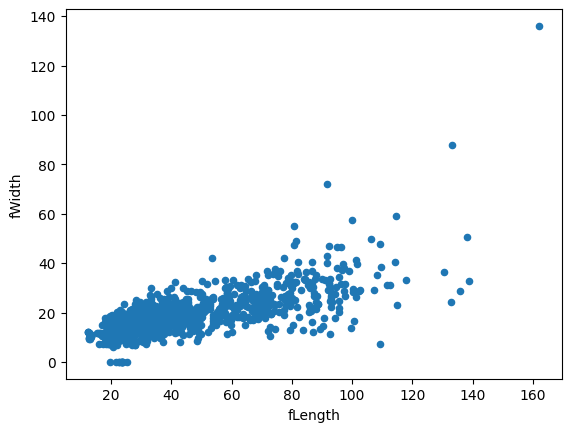

In [52]:
%matplotlib inline

data.plot.scatter("fLength","fWidth",)
plt.show()

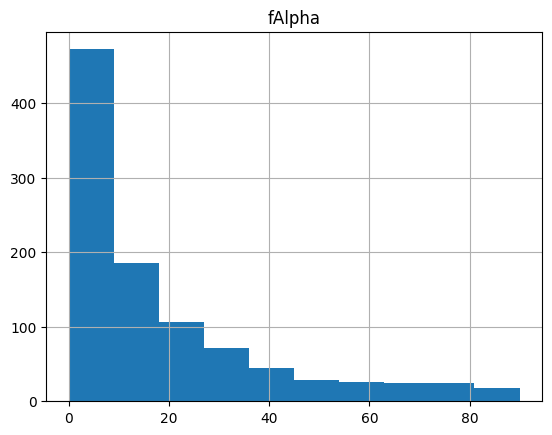

In [53]:
data.hist("fAlpha")
plt.show()

### ROOT

[ROOT](https://root.cern.ch/) needs a special mention. It is still nowadays, and by far, the most convenient tool to store and manage complex datasets pertaining physics experiments where "events" are recorded, in particular High Energy, Nuclear, Astro physics. It allows a nested structure, with complex data objects (classes) and references between them.

ROOT per se is obnoxious as it has been developed in the years as a way-too-many-purposes package, but its I/O is formidable.

Installing ROOT is (or at leaset used to be) a pain. 

(bare) ROOT files can be opened with non-ROOT library, [uproot](https://uproot.readthedocs.io/en/latest/index.html) (check its git [repo](https://github.com/scikit-hep/uproot)). To install it:
`pip install uproot awkward aiohttp`


A data structure, [RDataFrame](https://root.cern/doc/master/classROOT_1_1RDataFrame.html)
similar to the ones developed for modern Data Science applications has been put in production

In [58]:
import uproot

file = uproot.open("https://scikit-hep.org/uproot3/examples/nesteddirs.root")
events = uproot.open("https://scikit-hep.org/uproot3/examples/Zmumu.root")["events"]
events

<TTree 'events' (20 branches) at 0x76dc0ab1b2f0>

In [59]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Type                 | char*                    | AsStrings()
Run                  | int32_t                  | AsDtype('>i4')
Event                | int32_t                  | AsDtype('>i4')
E1                   | double                   | AsDtype('>f8')
px1                  | double                   | AsDtype('>f8')
py1                  | double                   | AsDtype('>f8')
pz1                  | double                   | AsDtype('>f8')
pt1                  | double                   | AsDtype('>f8')
eta1                 | double                   | AsDtype('>f8')
phi1                 | double                   | AsDtype('>f8')
Q1                   | int32_t                  | AsDtype('>i4')
E2                   | double                   | AsDtype('>f8')
px2                  | double                   | AsDtype('>f

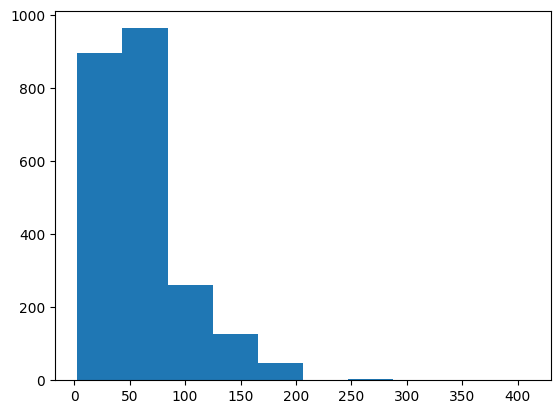

In [60]:
array = events["E1"].array(library="np")
array
plt.hist(array)
plt.show()

For more complicated examples, you can take a look at the CMS experiment [open data](http://opendata.cern.ch/docs/about-cms); sure you can find the Higgs boson in there, extracting the signal is way easier than obtaining, storing, and interpreting the data..